# <center> Unveiling Excellence: Analysis of Nobel Prize Winners (1901-2022) </center>

<center><img src="https://affairscloud.com/assets/uploads/2020/10/NOBLE-PRICE-WINNER-2020-two.jpg" width=700></center>

The Nobel Prize is one of the most prestigious international honors awarded annually in recognition of outstanding achievements in various fields. Established in 1895 by the will of Alfred Nobel, a Swedish inventor, engineer, and industrialist, the Nobel Prize celebrates individuals and organizations that have made remarkable contributions to humanity in six categories: Physics, Chemistry, Physiology or Medicine, Literature, Peace, and Economic Sciences.

The prizes are bestowed based on the recommendations of expert committees and organizations specific to each category. The Nobel Prizes have become a symbol of excellence and innovation, encouraging groundbreaking discoveries, literary excellence, peaceful diplomacy, and economic advancements.

The laureates, from diverse backgrounds and disciplines, have shaped our world and improved the lives of countless individuals through their remarkable accomplishments. The Nobel Prize continues to inspire and recognize those who strive to make significant positive impacts on society and contribute to the advancement of knowledge and human welfare.

# Introduction to Dataset
* The first Nobel Prizes were awarded in 1901 and they have been awarded annually since then. There have been years in that time when the Nobel Prizes have not been awarded - mostly during World War I (1914-1918) and II (1939-1945).
* Between 1901 and 2022, the Nobel Prizes and the Prize in Economic Sciences were awarded to 989 Individuals / Organizations.
* This dataset includes a record for every Individual or Organization that was awarded the Nobel Prize since 1901.
* This dataset was acquired from the Nobel Prize API.
* The columns included in the dataset are self-explainatory.

# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print("✅ Libraries Imported Successfully")

✅ Libraries Imported Successfully


In [2]:
pd.set_option('display.max_columns', None)

# Reading The Dataset

In [3]:
df = pd.read_csv(r"nobel_latest.csv")
df.head()

,Year,Laureate_Id,Firstname,Lastname,Category,Gender,Prize_Share,Motivation,Birth_Date,Birth_Country,Birth_City,Birth_Country_Code,Death_Date,Death_Country,Death_City,Death_Country_Code,Organization_Name,Organization_City,Organization_Country
0,1901,1,Wilhelm Conrad,Röntgen,physics,male,1,"""in recognition of the extraordinary services ...",1845-03-27,Prussia (now Germany),Lennep (now Remscheid),DE,10-02-1923,Germany,Munich,DE,Munich University,Munich,Germany
1,1901,293,Emil,von Behring,medicine,male,1,"""for his work on serum therapy especially its ...",1854-03-15,Prussia (now Poland),Hansdorf (now Lawice),PL,31-03-1917,Germany,Marburg,DE,Marburg University,Marburg,Germany
2,1901,462,Henry,Dunant,peace,male,2,"""for his humanitarian efforts to help wounded ...",1828-05-08,Switzerland,Geneva,CH,30-10-1910,Switzerland,Heiden,CH,NaN,NaN,NaN
3,1901,463,Frédéric,Passy,peace,male,2,"""for his lifelong work for international peace...",1822-05-20,France,Paris,FR,12-06-1912,France,Paris,FR,NaN,NaN,NaN
4,1901,569,Sully,Prudhomme,literature,male,1,"""in special recognition of his poetic composit...",1839-03-16,France,Paris,FR,07-09-1907,France,Châtenay,FR,NaN,NaN,NaN


In [4]:
# Finding Shape of the dataset
df.shape

(989, 19)

In [5]:
# Getting a List of all the columns and their datatypes in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  989 non-null    int64 
 1   Laureate_Id           989 non-null    int64 
 2   Firstname             989 non-null    object
 3   Lastname              957 non-null    object
 4   Category              989 non-null    object
 5   Gender                989 non-null    object
 6   Prize_Share           989 non-null    int64 
 7   Motivation            989 non-null    object
 8   Birth_Date            989 non-null    object
 9   Birth_Country         958 non-null    object
 10  Birth_City            956 non-null    object
 11  Birth_Country_Code    958 non-null    object
 12  Death_Date            989 non-null    object
 13  Death_Country         646 non-null    object
 14  Death_City            640 non-null    object
 15  Death_Country_Code    646 non-null    ob

#### Observe that we have a total of 989 records

# Data Preprocessing

## Data Cleaning and Handling null values.

In [6]:
df.isnull().sum()

Year                      0
Laureate_Id               0
Firstname                 0
Lastname                 32
Category                  0
Gender                    0
Prize_Share               0
Motivation                0
Birth_Date                0
Birth_Country            31
Birth_City               33
Birth_Country_Code       31
Death_Date                0
Death_Country           343
Death_City              349
Death_Country_Code      343
Organization_Name       262
Organization_City       267
Organization_Country    265
dtype: int64

#### Handling Null values in "Lastname".
* Filling the null values in the "Lastname" column with a blank space.

In [7]:
df["Lastname"].fillna("", inplace=True)

#### Handling null values in Birth Columns.
* Birth Columns = [Birth_Country, Birth_City, Birth_Country_Code]
* Filling the null values in Birth Columns with "Unknown".

In [8]:
birth_cols = ["Birth_Country", "Birth_City", "Birth_Country_Code"]

In [9]:
for col in birth_cols:
    df[col].fillna("Unknown", inplace=True)

#### Handling Null Values in Death Columns.
* Death Columns = [Death_Country, Death_City, Death_Country_Code]
* Filling the null values in Death Columns with "Unknown"

In [10]:
death_cols = ["Death_Country", "Death_City", "Death_Country_Code"]

In [11]:
for col in death_cols:
    df[col].fillna("Unknown", inplace=True)

#### Modifying the "Death_Date" column to correctly represent the information of Alive Laureates.
* Observe that some of the values in the "Death_Date" column are "0000-00-00". These represent the Death_Dates for Alive Laureates.
* We shall replace this value with "Unknown".

In [12]:
mask = (df["Death_Date"] == "0000-00-00")

In [13]:
df.loc[mask, "Death_Date"] = "Unknown"

#### Handling Null values in "organization info" columns.
* Organization Columns = [Organization_Name, Organization_City, Organization_Country]
* Filling null values in organization columns with "None".

In [14]:
org_cols = ["Organization_Name", "Organization_City", "Organization_Country"]

In [15]:
for col in org_cols:
    df[col].fillna("None", inplace=True)

In [16]:
df.isnull().sum()

Year                    0
Laureate_Id             0
Firstname               0
Lastname                0
Category                0
Gender                  0
Prize_Share             0
Motivation              0
Birth_Date              0
Birth_Country           0
Birth_City              0
Birth_Country_Code      0
Death_Date              0
Death_Country           0
Death_City              0
Death_Country_Code      0
Organization_Name       0
Organization_City       0
Organization_Country    0
dtype: int64

#### Observe that all the null values have been handled.

## Adding some New columns for our Analysis

#### Adding a new column called "Fullname" by concatenating "Firstname" and "Lastname".

In [17]:
# Defining a function in order to concatenate 'Firstname' and 'Lastname'.
def fullname(x): 
    full_name = str(x[0]) + " " + str(x[1])
    return full_name

In [18]:
# Adding a new column called Fullname to the Dataset
df["Fullname"] = df[['Firstname', 'Lastname']].apply(lambda x: fullname(x), axis = 1)

#### Adding a new column called "Birth_Year"
* We are adding this column so that we can perform analysis on Age of the laureates when they got the prize.

In [19]:
# Defining a function to extract the "Year" from the "Birth_Date".
def extract_birth_year(x):
    y = x.split("-")
    if len(y[0]) == 2:
        return int(y[2])
    elif len(y[0]) == 4:
        return int(y[0])

In [20]:
# Adding a new column called "Birth_Year"
df["Birth_Year"] = df["Birth_Date"].apply(lambda x: extract_birth_year(x))

#### Adding a new column called "Win_Age"
* This column will show us the approximate age of the laureates when they won the prize.
* We can calculate it by subtracting "Birth_Year" from "Year".

In [21]:
df["Win_Age"] = df["Year"] - df["Birth_Year"]

#### Adding a new column called "Laureate_Type"
* We can bifurcate the laureates on the basis of their types being "Individual" or "Organization"
* The laureates with Gender = "org" can be categorized as being "Organization", rest others can be considered as "Individual".

In [22]:
# Defining a function to separate out the "Individuals" and "Organizations"
def laureate_type(gender):
    if gender == "org":
        return "Organization"
    else:
        return "Individual"

In [23]:
df["Laureate_Type"] = df["Gender"].apply(lambda x: laureate_type(x))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  989 non-null    int64 
 1   Laureate_Id           989 non-null    int64 
 2   Firstname             989 non-null    object
 3   Lastname              989 non-null    object
 4   Category              989 non-null    object
 5   Gender                989 non-null    object
 6   Prize_Share           989 non-null    int64 
 7   Motivation            989 non-null    object
 8   Birth_Date            989 non-null    object
 9   Birth_Country         989 non-null    object
 10  Birth_City            989 non-null    object
 11  Birth_Country_Code    989 non-null    object
 12  Death_Date            989 non-null    object
 13  Death_Country         989 non-null    object
 14  Death_City            989 non-null    object
 15  Death_Country_Code    989 non-null    ob

## Dropping Unnecessary columns and finalizing our DataFrame for analysis

#### Since we created the "Fullname" column, we can drop the "Firstname" and "Lastname" columns.

In [25]:
df.drop(columns=["Firstname", "Lastname"], inplace=True)

#### Organizing the columns and getting our final DataFrame to perform Analysis

In [26]:
columns = ['Year', 'Category', 'Laureate_Id', 'Laureate_Type', 'Fullname', 'Gender',
       'Prize_Share', 'Birth_Date', 'Birth_Year','Win_Age', 'Birth_Country',
       'Birth_City', 'Birth_Country_Code', 'Death_Date', 'Death_Country',
       'Death_City', 'Death_Country_Code', 'Organization_Name',
       'Organization_City', 'Organization_Country', 'Motivation']

In [27]:
df = df[columns]

In [28]:
# Here is a final look of the DataFrame that we shall analyze.
df.head()

,Year,Category,Laureate_Id,Laureate_Type,Fullname,Gender,Prize_Share,Birth_Date,Birth_Year,Win_Age,Birth_Country,Birth_City,Birth_Country_Code,Death_Date,Death_Country,Death_City,Death_Country_Code,Organization_Name,Organization_City,Organization_Country,Motivation
0,1901,physics,1,Individual,Wilhelm Conrad Röntgen,male,1,1845-03-27,1845,56,Prussia (now Germany),Lennep (now Remscheid),DE,10-02-1923,Germany,Munich,DE,Munich University,Munich,Germany,"""in recognition of the extraordinary services ..."
1,1901,medicine,293,Individual,Emil von Behring,male,1,1854-03-15,1854,47,Prussia (now Poland),Hansdorf (now Lawice),PL,31-03-1917,Germany,Marburg,DE,Marburg University,Marburg,Germany,"""for his work on serum therapy especially its ..."
2,1901,peace,462,Individual,Henry Dunant,male,2,1828-05-08,1828,73,Switzerland,Geneva,CH,30-10-1910,Switzerland,Heiden,CH,None,None,None,"""for his humanitarian efforts to help wounded ..."
3,1901,peace,463,Individual,Frédéric Passy,male,2,1822-05-20,1822,79,France,Paris,FR,12-06-1912,France,Paris,FR,None,None,None,"""for his lifelong work for international peace..."
4,1901,literature,569,Individual,Sully Prudhomme,male,1,1839-03-16,1839,62,France,Paris,FR,07-09-1907,France,Châtenay,FR,None,None,None,"""in special recognition of his poetic composit..."


# Exploratory Data Analysis

## Analyzing the number of Nobel Prizes given over the years

In [29]:
temp_df = df["Year"].value_counts().sort_index().reset_index()

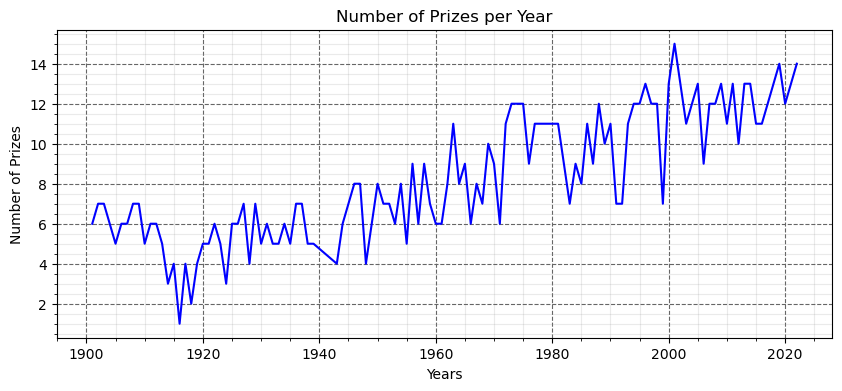

In [30]:
plt.figure(figsize = (10,4))

plt.plot(temp_df["Year"], temp_df["count"], color="blue")

plt.xlabel("Years")
plt.ylabel("Number of Prizes")

plt.title("Number of Prizes per Year")

plt.grid(visible=True, which='major', color='#666666', linestyle='--')

plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

In [31]:
df1 = df.groupby("Year")["Laureate_Id"].count().cumsum().reset_index()

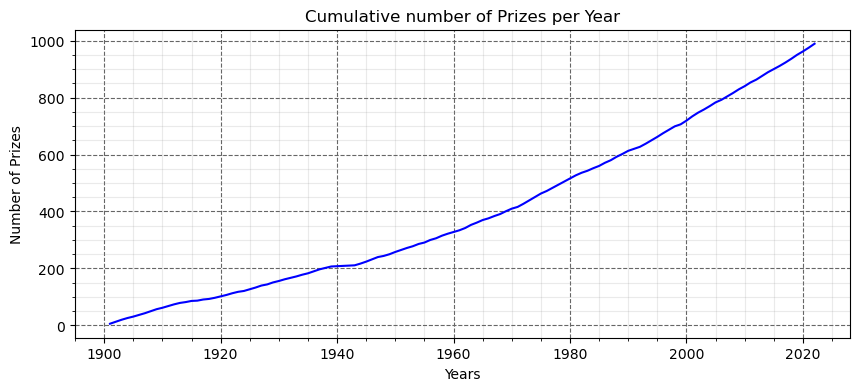

In [32]:
plt.figure(figsize = (10,4))

plt.plot(df1["Year"], df1["Laureate_Id"], color="blue")
plt.xlabel("Years")
plt.ylabel("Number of Prizes")

plt.title("Cumulative number of Prizes per Year")

plt.grid(visible=True, which='major', color='#666666', linestyle='--')

plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

* We can observe that the number of Nobel Prizes awarded have overall **Increased** per year with the **exception** of **years of WW2: 1940-42**, when no prizes were awarded.

## Analyzing the Categories

In [33]:
df["Category"].value_counts()

Category
medicine      225
physics       222
chemistry     191
peace         140
literature    119
economics      92
Name: count, dtype: int64

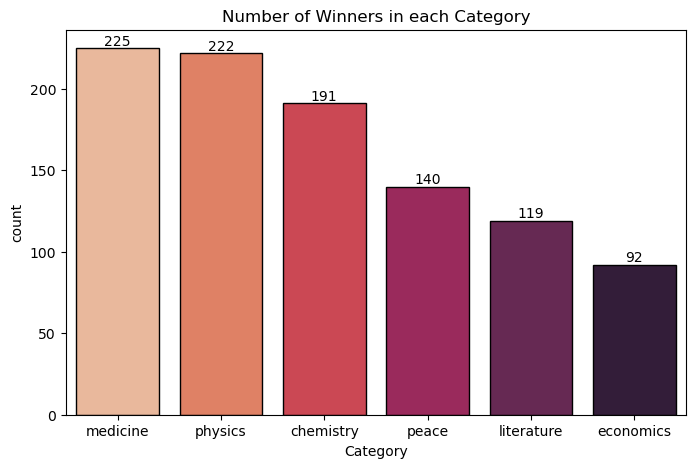

In [34]:
plt.figure(figsize = (8,5))

ax = sns.countplot(data=df, x="Category", order=df["Category"].value_counts().index, palette = sns.color_palette("rocket_r"), edgecolor='black')

for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Number of Winners in each Category")
plt.show()

* We can observe that the **Most number of Nobel Prizes** are given in the Fields of **Medicine** and **Physics**
* Nobel Prizes in **Economics** were awarded from the year **1969**. Hence the total awardees in this category are **low**.

## Gender Representation in Nobel Prize.

In [35]:
# Removing 'org' from our gender column
temp_df = df[df["Gender"]!="org"]

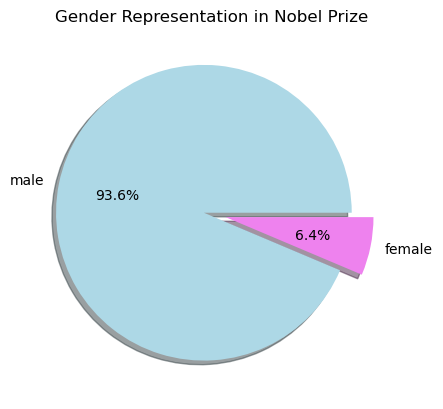

In [36]:
# Plotting a pie chart to analyze the percentage of male and female laureates.
freq = temp_df["Gender"].value_counts()
keys = freq.keys().to_list()
counts = freq.to_list()

color = ["lightblue", "violet"]
explode = [0.05, 0.1]

plt.pie(x=counts, labels=keys, autopct="%1.1f%%", colors = color, explode = explode, shadow=True)
plt.title("Gender Representation in Nobel Prize")
plt.show()

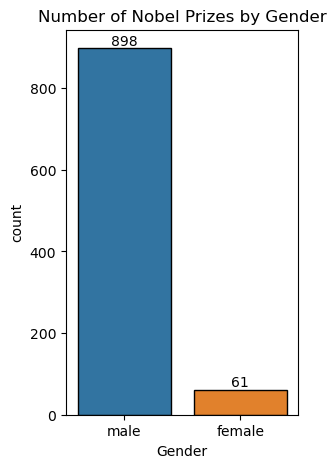

In [37]:
# Plotting a countplot to check the number of male and female laureates
plt.figure(figsize=(3,5))
ax = sns.countplot(data=temp_df, x="Gender", edgecolor='black')

for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Number of Nobel Prizes by Gender")
plt.show()

In [38]:
# Further analysis of female laureates
df_female = df[df["Gender"]=="female"]

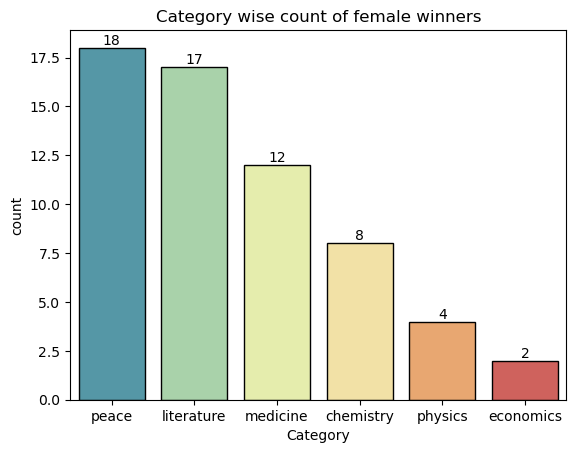

In [39]:
# Plotting a countplot to find out the categories in which "female" laureates get the prize.
ax = sns.countplot(data=df_female, x="Category", order=df_female["Category"].value_counts().index, palette=sns.color_palette("Spectral_r"), edgecolor='black')

for label in ax.containers:
    ax.bar_label(label)
plt.title("Category wise count of female winners")
plt.show()

* We can observe that there is a Huge gap between the number of Male and Female Laureates.
* Out of the **959 Individual** Laureates, there are **898 male laureates(93.6%)** and only **61 female laureates(6.4%)**.
* **Female** laureates have mostly won Nobel Prizes in the categories of **"Peace"** and **"Literature"**.

## Analyisis of Laureate types.
* Individuals or Organizations

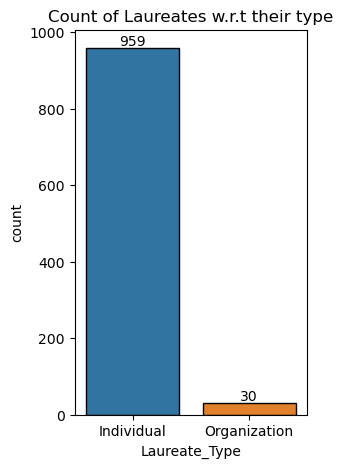

In [40]:
plt.figure(figsize=(3,5))
ax = sns.countplot(data=df, x="Laureate_Type", edgecolor='black')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Count of Laureates w.r.t their type")
plt.show()

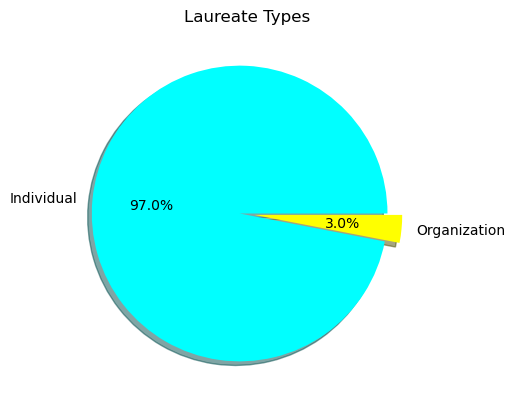

In [41]:
freq = df["Laureate_Type"].value_counts()
keys = freq.keys().to_list()
counts = freq.to_list()

color = ["aqua", "yellow"]
explode = [0.05, 0.05]

plt.pie(x=counts, labels=keys, autopct="%1.1f%%", colors = color, explode = explode, shadow=True)
plt.title("Laureate Types")
plt.show()

In [42]:
df_org = df[df["Laureate_Type"] == "Organization"]

In [43]:
df_org["Category"].value_counts()

Category
peace    30
Name: count, dtype: int64

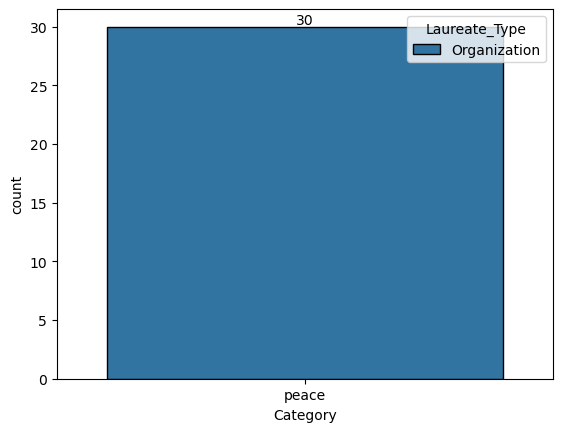

In [44]:
ax = sns.countplot(data=df_org, x="Category", hue="Laureate_Type", order=df_org["Category"].value_counts().index, edgecolor='black')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

* We can observe that a large majority of the Nobel Prize Winners are **Individuals (97%)**.
* All the **Organizations** that have won the Nobel Prize, have won it in the category of **"Peace"**.

## Nationality Analysis
* Analyzing the birth country of nobel laureates

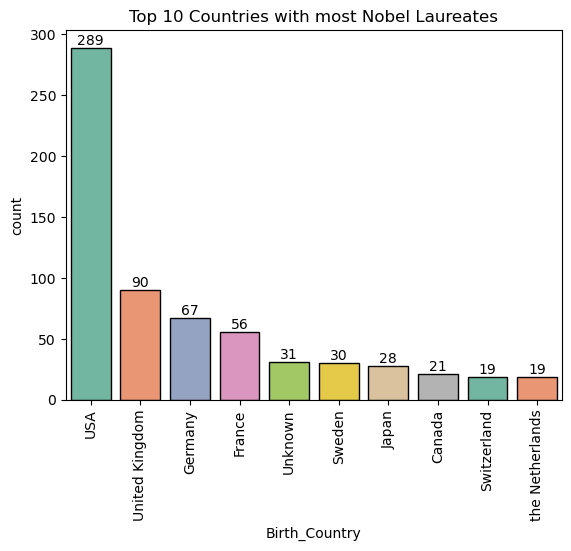

In [45]:
# Plotting a countplot to show the top 10 countries that have produced the most number of Nobel Laureates.
ax = sns.countplot(data=df, x="Birth_Country", order=df["Birth_Country"].value_counts().head(10).index, palette=sns.color_palette("Set2"), edgecolor='black')
for label in ax.containers:
    ax.bar_label(label)

plt.xticks(rotation=90)
plt.title("Top 10 Countries with most Nobel Laureates")
plt.show()

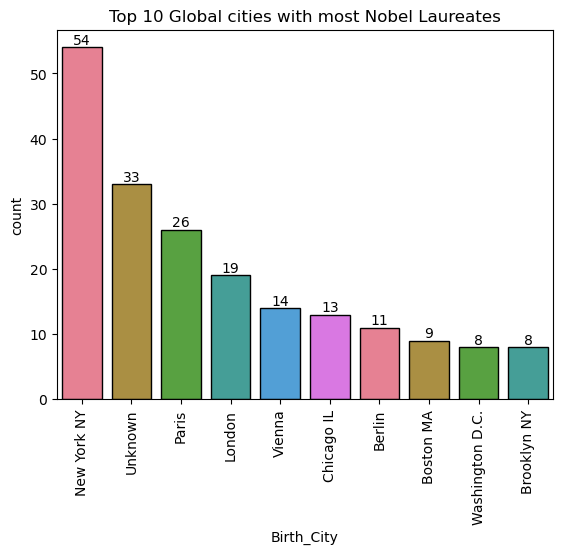

In [46]:
# Plotting a countplot to showcase the top 10 cities that have produced the most nobel laureates.
ax = sns.countplot(data=df, x="Birth_City", order=df["Birth_City"].value_counts().head(10).index, palette=sns.color_palette("husl"), edgecolor='black')
for label in ax.containers:
    ax.bar_label(label)

plt.xticks(rotation=90)
plt.title("Top 10 Global cities with most Nobel Laureates")
plt.show()

In [47]:
# Further analyzing the laureates born in USA
df_usa = df[df["Birth_Country"]=="USA"]

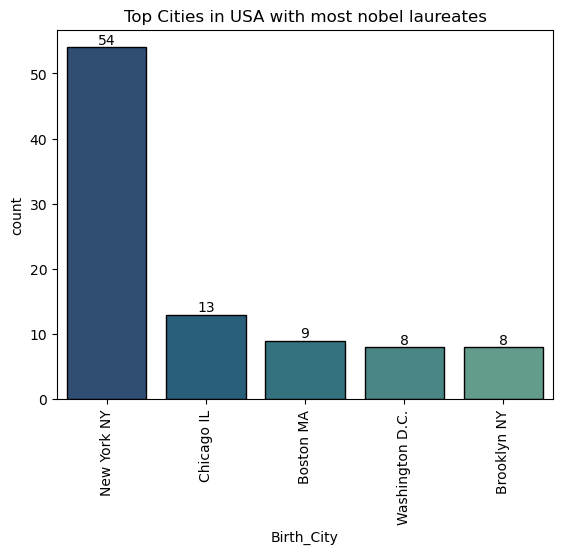

In [48]:
ax = sns.countplot(data=df_usa, x="Birth_City", order=df_usa["Birth_City"].value_counts().head().index, palette=sns.color_palette("crest_r"), edgecolor='black')
for label in ax.containers:
    ax.bar_label(label)

plt.xticks(rotation=90)
plt.title("Top Cities in USA with most nobel laureates")
plt.show()

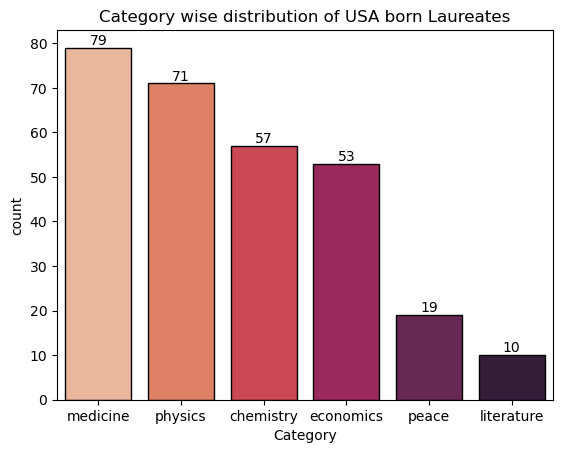

In [49]:
ax = sns.countplot(data=df_usa, x="Category", order=df_usa["Category"].value_counts().index, palette=sns.color_palette("rocket_r"), edgecolor='black')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Category wise distribution of USA born Laureates")
plt.show()

* We can observe that **USA** has produced the lion's share of nobel laureates.
* On analyzing the cities that produced the most nobel laureates, we observe that most laureates were born in **New York(USA)**.
* Top 5 cities in **USA** that produced most laureates include **NewYork**, **Chicago**, **Boston**, **Washington DC** and **Brooklyn**.
* On further analyzing the **USA** born laureates, we can observe that most of them have won the nobel prizes in the category of **"Medicine"**, closely followed by the category of **"Physics"**.

## Analysis of Affiliated Organizations.

In [50]:
# Filtering the dataset to avoid the data with unknown values for affiliated organizations.
df_aff = df[df["Organization_Name"] != "None"]

In [51]:
df_aff.shape
# Observe that we have 727 laureates that had affiliations with some organizations

(727, 21)

In [52]:
df_aff["Organization_Name"].value_counts().head(10)

Organization_Name
University of California                        36
Harvard University                              27
Stanford University                             22
Massachusetts Institute of Technology (MIT)     21
University of Chicago                           19
California Institute of Technology (Caltech)    17
Columbia University                             17
Princeton University                            17
University of Cambridge                         17
Rockefeller University                          13
Name: count, dtype: int64

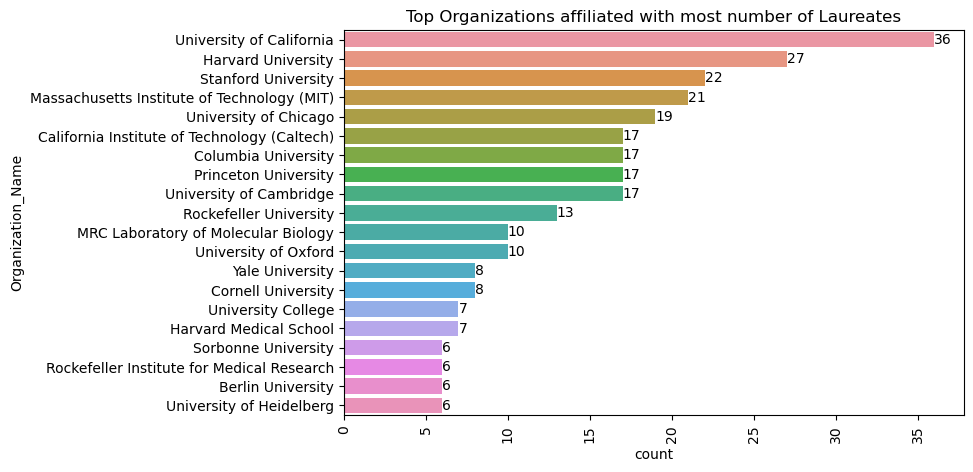

In [53]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_aff, y="Organization_Name", order=df_aff["Organization_Name"].value_counts().head(20).index)
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.title("Top Organizations affiliated with most number of Laureates")
plt.show()

* We can observe that **"University of California"**, **"Harvard University"**, **"Stanford University"** and **"MIT"** are the top organizations with which Nobel Laureates are affiliated.

## Prize Sharing
* The Nobel Prize could be split among up to 4 people who had contributed to the final solution.

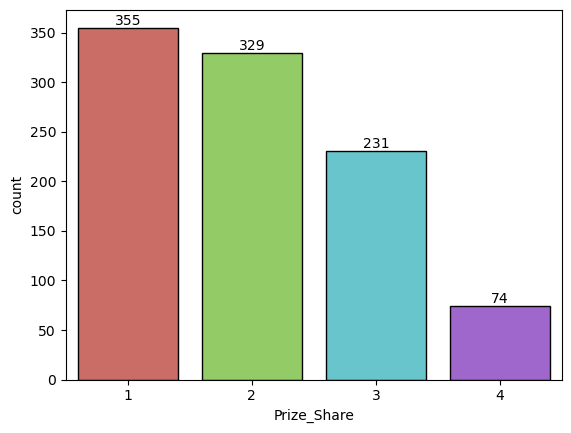

In [54]:
ax = sns.countplot(data=df, x="Prize_Share", palette=sns.color_palette("hls",4), edgecolor='black')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

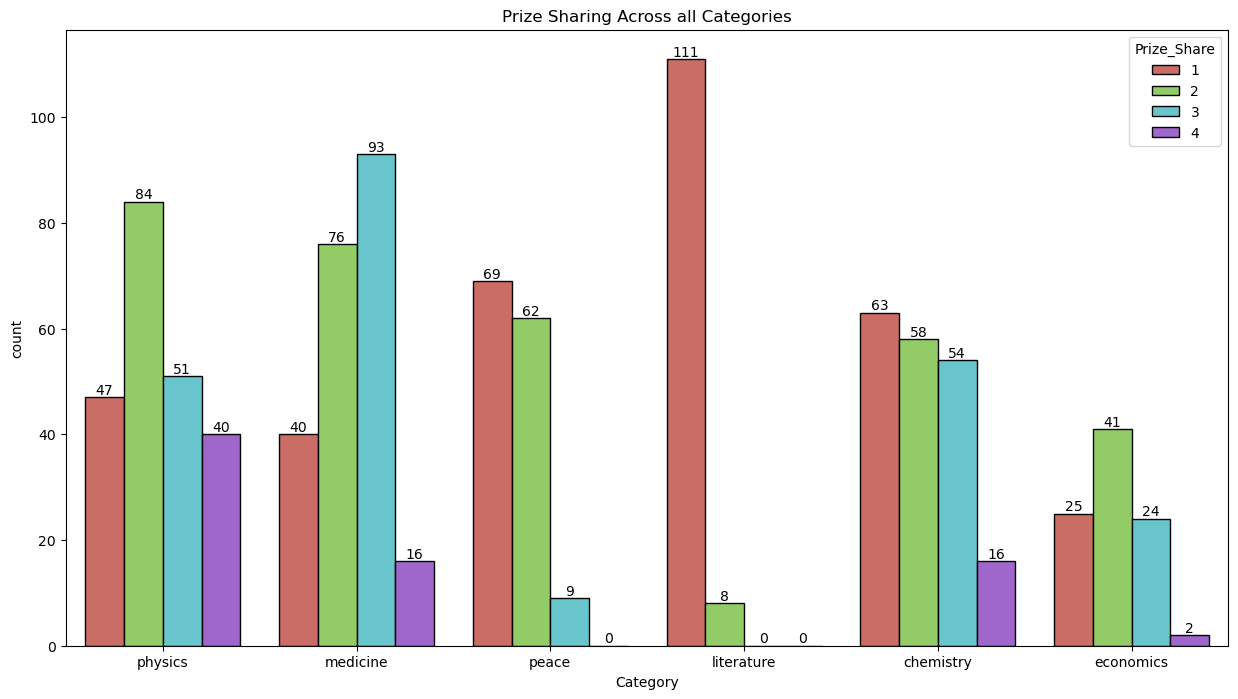

In [55]:
plt.figure(figsize = (15,8))
ax = sns.countplot(data=df, x="Category", hue="Prize_Share", palette = sns.color_palette("hls", 4), edgecolor='black')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Prize Sharing Across all Categories")
plt.show()

* Upon analyzing the above plots we can observe that number of nobel prizes won by **Solo** laureates is still the greatest.
* Considering that low hanging fruit is usually picked first, is it possible that the prize sharing has increased in contemporary times due to problems becoming harder and harder to the point where one person alone can’t discover a solution completely on their own.
* Upon further analyzing the prize sharing in all categories, we can observe that:
    * In the field of *Physics*, most nobel prizes are won by **2 individuals working together**.
    * In the field of *Medicine*, most nobel prizes are won by **3 individuals working together**.
    * In the field of *Peace*, most nobel prizes are won by **Solo** individuals, closely followed by **2 individuals working together**.
    * In the field of *Literature*, Individual creativity reigns supereme and most nobels are won by **Solo** individuals.
    * In the field of *Chemistry*, most nobels are won by **Solo** laureates, but no. of prizes shared between **2 and 3 people** is also very close.
    * In the field of *Economics*, most prizes are won by **2 individuals working together**.

## Analyzing Age of Laureates when they won the Nobel Prize.
* We shall be only analyzing the **Win_Age** of **Individuals** who won the Prize.

In [56]:
df_ind = df[df["Laureate_Type"]=="Individual"]

In [57]:
# Finding the Overall mean age of Laureates.
mean_win_age = round(df_ind["Win_Age"].mean(), 2)
mean_win_age

60.16

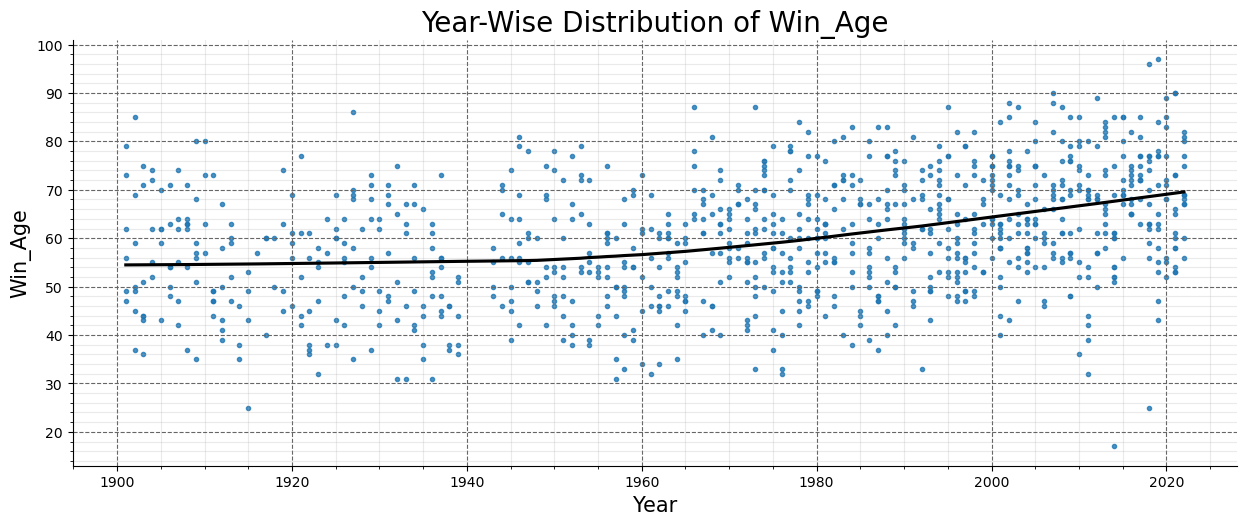

In [58]:
# Plotting a lmplot to showcase year-wise distribution of Win_Age of laureates
g=sns.lmplot(data=df_ind, x="Year", y="Win_Age", aspect=2.5, lowess=True, markers=".", line_kws={'color' : 'black'})
g.set_axis_labels("Year", "Win_Age", fontsize=15)
plt.title("Year-Wise Distribution of Win_Age", fontdict={'fontsize':20})
plt.grid(visible=True, which='major', color='#666666', linestyle='--')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

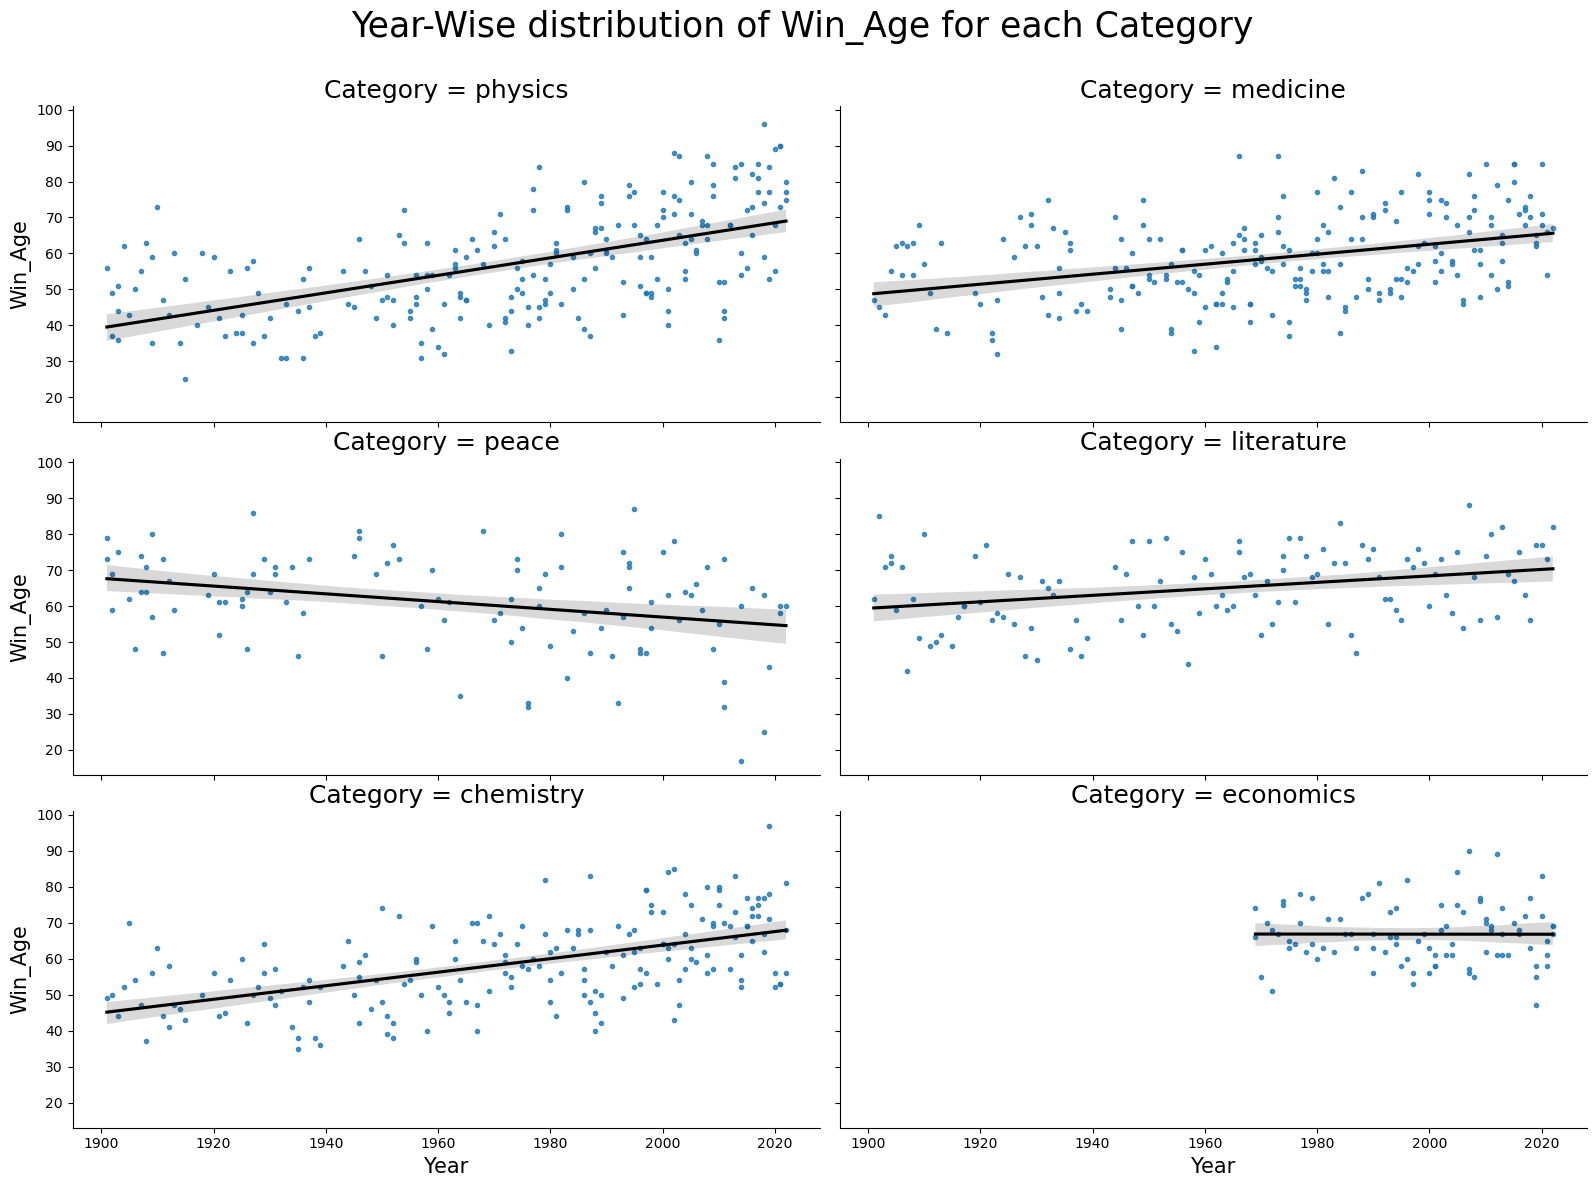

In [59]:
# Further the above plot for all the categories
g = sns.lmplot(data=df_ind, x="Year", y="Win_Age", col="Category", markers=".", col_wrap=2, height=4, aspect=2, line_kws={'color':'black'})
g.set_titles(size=18)
g.set_axis_labels("Year", "Win_Age", fontsize=15)
plt.suptitle('Year-Wise distribution of Win_Age for each Category', fontsize=25)
plt.subplots_adjust(top=0.9)
plt.show()

In [60]:
# Calculating mean Win_Age for all the different categories
temp_df = df_ind.groupby("Category")["Win_Age"].mean().sort_values(ascending=False).reset_index()
temp_df

,Category,Win_Age
0,economics,66.826087
1,literature,65.008403
2,peace,60.863636
3,chemistry,58.905759
4,medicine,58.631111
5,physics,57.099099


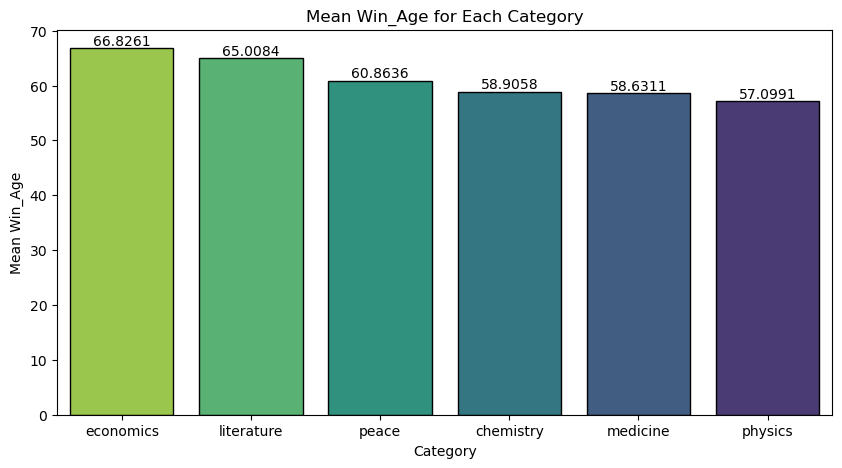

In [61]:
# Plotting the Mean Age for all Categories
plt.figure(figsize=(10,5))
ax = sns.barplot(data=temp_df, x='Category', y="Win_Age", palette=sns.color_palette(palette="viridis_r", n_colors=6, desat=1), edgecolor='black')
for label in ax.containers:
    ax.bar_label(label)
    
plt.ylabel("Mean Win_Age")
plt.title("Mean Win_Age for Each Category")
plt.show()

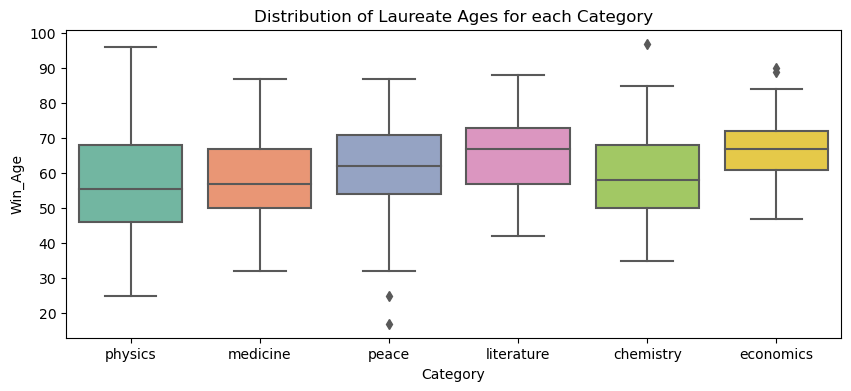

In [62]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df_ind, x="Category", y="Win_Age", palette=sns.color_palette(palette="Set2", n_colors=6, desat=1))
plt.title("Distribution of Laureate Ages for each Category")
plt.show()

* The **Average Win_Age** of the Nobel laureate is growing over time, from early 50-ies in 1901 to late 60-ies in 2022.

* Lets record our observations regarding average win_age across all Catgories:
    * The *average* age of laureates has **Increased** overtime in the categories of ***Physics***, ***Chemistry*** and ***Medicine***.
    * The *average* age has remained **Almost Constant** in the categories of ***Literature*** and ***Economics***. 
    * The *average* age has **Declined** overtime in the category of ***Peace***.
    
* Observe that overall **Mean** age is **Highest** for ***Economics*** and **Lowest** for ***Physics***.
* From the boxplot, it looks like the ***Economic Sciences***, ***Literature*** and ***Peace*** laureates are in general **older** than those working in ***Physics***, ***Chemistry*** and ***Medicine***.

# Lets have some Trivia Questions from our dataset.

### Who is the youngest Individual to win the Nobel Prize?

In [63]:
mask = (df_ind["Win_Age"] == df_ind["Win_Age"].min())
df_ind[mask].loc[:, ["Year", "Fullname", "Win_Age", "Category"]]

,Year,Fullname,Win_Age,Category
877,2014,Malala Yousafzai,17,peace


* The Youngest Laureate to ever win the coveted Nobel Prize was ***Malala Yousafzai*** who won in the category of **Peace** in **2014** at the age of **17**.

### Who is the oldest Individual to win the Nobel Prize?

In [64]:
mask = (df_ind["Win_Age"] == df_ind["Win_Age"].max())
df_ind[mask].loc[:, ["Year", "Fullname", "Win_Age", "Category"]]

,Year,Fullname,Win_Age,Category
949,2019,John Goodenough,97,chemistry


* The Oldest Laureate to ever win the coveted Nobel Prize was ***John Goodenough*** who won in the category of **Chemistry** in **2019** at the age of **97**.

### Which Individuals have won the Nobel Prize more than once ?

In [65]:
df_ind["Fullname"].value_counts()[df_ind["Fullname"].value_counts() > 1]

Fullname
Marie Curie         2
Linus Pauling       2
John Bardeen        2
Frederick Sanger    2
Barry Sharpless     2
Name: count, dtype: int64

* *Five* Individual laureates **"Marie Curie"**, **"Linus Pauling"**, **"John Bardeen"**, **"Frederick Sanger"** and **"Barry Sharpless"** have won the coveted Nobel Prize on **TWO** occasions.

### Which Organizations have won the Nobel Prize more than once ?

In [66]:
df_org["Fullname"].value_counts()[df_org["Fullname"].value_counts() > 1]

Fullname
International Committee of the Red Cross                        3
Office of the United Nations High Commissioner for Refugees     2
Name: count, dtype: int64

* **Two** Organizations have won the coveted Nobel Prize on more than one occasion.
    * ***International Committee of the Red Cross*** has won **3** times
    * ***Office of the United Nations High Commissioner for Refugees*** has won **2** times

### Which organization won the Nobel Prize at its youngest age?

In [67]:
df_org[df_org["Win_Age"] == df_org["Win_Age"].min()].loc[:, ["Year", "Category", "Fullname", "Laureate_Type", "Birth_Year", "Win_Age"]]

,Year,Category,Fullname,Laureate_Type,Birth_Year,Win_Age
890,2015,peace,National Dialogue Quartet,Organization,2013,2


* ***National Dialogue Quartet*** won the Nobel Peace Prize in **2015** merely **two** years after it was started in **2013**.

# <center> Thank You !!</center>